<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [1]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'corona-virus-report' dataset.
Path to dataset files: /kaggle/input/corona-virus-report


In [2]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

In [6]:
import matplotlib.pyplot as plt# The imports
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [9]:
confirmed_dates = df.groupby('Date')['Confirmed'].sum()

In [10]:
confirmed_dates

,Confirmed
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-07-23,15510481
2020-07-24,15791645
2020-07-25,16047190


In [11]:
confirmed_dates.reset_index()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


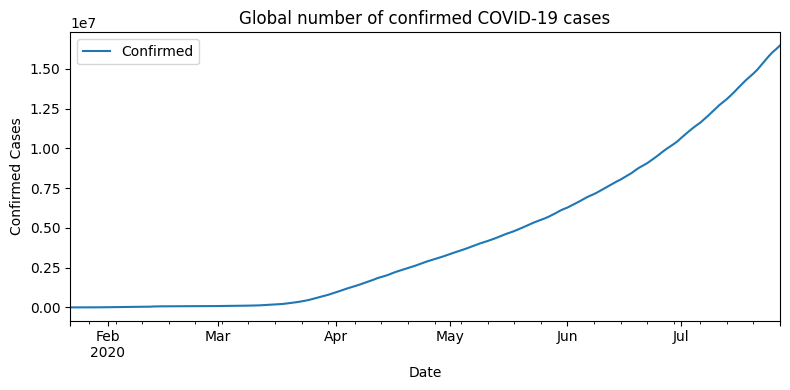

In [12]:
confirmed_dates.plot(kind="line", figsize=(8,4))
plt.title("Global number of confirmed COVID-19 cases")
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.tight_layout()
plt.show()

2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

In [13]:
three_countries = df.query('`Country/Region` in ["Philippines", "Japan", "Singapore"]')

In [14]:
three_countries_grouped = three_countries.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()

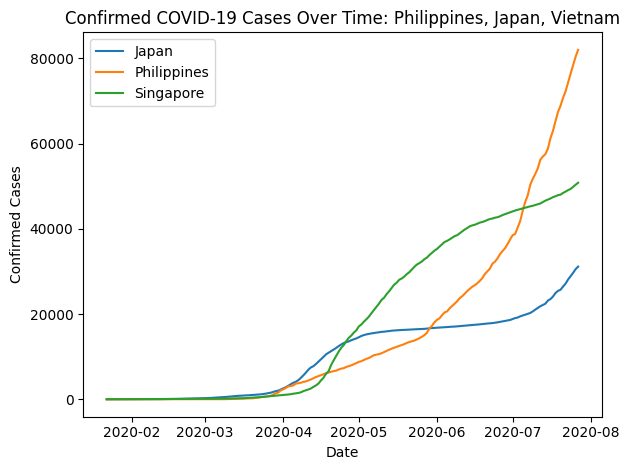

In [15]:
plt.figure()
for country in three_countries_grouped['Country/Region'].unique():
    subset = three_countries_grouped[three_countries_grouped['Country/Region'] == country]
    plt.plot(subset['Date'], subset['Confirmed'], label=country)

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed COVID-19 Cases Over Time: Philippines, Japan, Vietnam')
plt.legend()
plt.tight_layout()
plt.show()

3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

In [16]:
japan_cases = df.query('`Country/Region` == "Japan"')
japan_cases.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
137,NaN,Japan,36.204824,138.252924,2020-01-22,2,0,0,2,Western Pacific
398,NaN,Japan,36.204824,138.252924,2020-01-23,2,0,0,2,Western Pacific
659,NaN,Japan,36.204824,138.252924,2020-01-24,2,0,0,2,Western Pacific
920,NaN,Japan,36.204824,138.252924,2020-01-25,2,0,0,2,Western Pacific
1181,NaN,Japan,36.204824,138.252924,2020-01-26,4,0,1,3,Western Pacific


In [17]:
japan_cases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 137 to 48944
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  0 non-null      object        
 1   Country/Region  188 non-null    object        
 2   Lat             188 non-null    float64       
 3   Long            188 non-null    float64       
 4   Date            188 non-null    datetime64[ns]
 5   Confirmed       188 non-null    int64         
 6   Deaths          188 non-null    int64         
 7   Recovered       188 non-null    int64         
 8   Active          188 non-null    int64         
 9   WHO Region      188 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 20.2+ KB


In [18]:
japan_cases.groupby('Date')[['Active','Recovered']].sum().reset_index()

,Date,Active,Recovered
0,2020-01-22,2,0
1,2020-01-23,2,0
2,2020-01-24,2,0
3,2020-01-25,2,0
4,2020-01-26,3,1
...,...,...,...
183,2020-07-23,6244,20878
184,2020-07-24,6716,21173
185,2020-07-25,7224,21464
186,2020-07-26,7944,21606


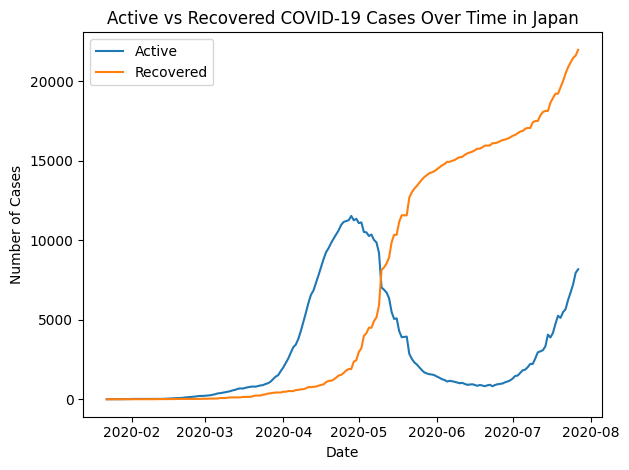

In [19]:
plt.figure()
plt.plot(japan_cases['Date'], japan_cases['Active'], label='Active')
plt.plot(japan_cases['Date'], japan_cases['Recovered'], label='Recovered')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title(f'Active vs Recovered COVID-19 Cases Over Time in Japan')
plt.legend()
plt.tight_layout()
plt.show()

## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

In [20]:
march_cases = df.query('`Date`.dt.month == 3')
march_cases

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
10179,NaN,Afghanistan,33.939110,67.709953,2020-03-01,1,0,0,1,Eastern Mediterranean
10180,NaN,Albania,41.153300,20.168300,2020-03-01,0,0,0,0,Europe
10181,NaN,Algeria,28.033900,1.659600,2020-03-01,1,0,0,1,Africa
10182,NaN,Andorra,42.506300,1.521800,2020-03-01,0,0,0,0,Europe
10183,NaN,Angola,-11.202700,17.873900,2020-03-01,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
18265,NaN,Sao Tome and Principe,0.186400,6.613100,2020-03-31,0,0,0,0,Africa
18266,NaN,Yemen,15.552727,48.516388,2020-03-31,0,0,0,0,Eastern Mediterranean
18267,NaN,Comoros,-11.645500,43.333300,2020-03-31,0,0,0,0,Africa
18268,NaN,Tajikistan,38.861000,71.276100,2020-03-31,0,0,0,0,Europe


In [21]:
march_cases = march_cases.groupby('Country/Region')['Confirmed'].sum().nlargest(10)
march_cases

,Confirmed
Country/Region,
China,2515426
Italy,1209772
US,1091068
Spain,742546
Germany,588179
Iran,525947
France,410316
United Kingdom,283195
South Korea,244918


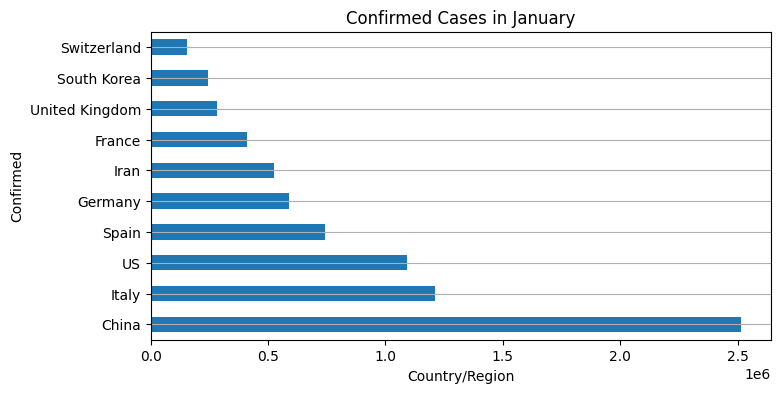

In [22]:
# Plot bar chart
march_cases.plot(kind="barh", figsize=(8, 4))
plt.title("Confirmed Cases in January")
plt.xlabel("Country/Region")
plt.ylabel("Confirmed")
plt.grid(axis="y")
plt.show()

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

In [23]:
confirmedby_who = df.groupby('WHO Region')['Confirmed'].sum()
confirmedby_who.head()

,Confirmed
WHO Region,
Africa,21791827
Americas,402261194
Eastern Mediterranean,74082892
Europe,248879793
South-East Asia,55118365


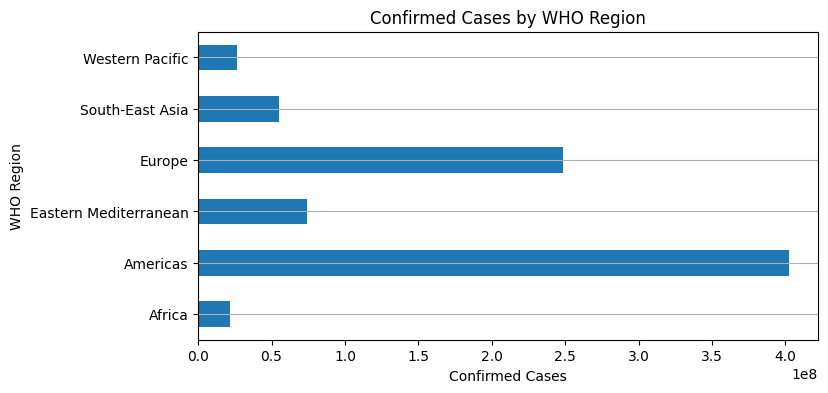

In [24]:
# Plot bar chart
confirmedby_who.plot(kind="barh", figsize=(8, 4))
plt.title("Confirmed Cases by WHO Region")
plt.xlabel("Confirmed Cases")
plt.ylabel("WHO Region")
plt.grid(axis="y")
plt.show()

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [26]:
june_cases = df.query('`Date`.dt.month == 6')

june_confirmed = june_cases.groupby(['Country/Region', 'Lat', 'Long'])['Confirmed'].max().reset_index()

In [27]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [28]:
june_confirmed.head()

,Country/Region,Lat,Long,Confirmed
0,Afghanistan,33.93911,67.709953,31517
1,Albania,41.15330,20.168300,2535
2,Algeria,28.03390,1.659600,13907
3,Andorra,42.50630,1.521800,855
4,Angola,-11.20270,17.873900,284


In [29]:
# pip install plotly.express

In [30]:
import plotly.express as px
import pandas as pd

# Create choropleth map
fig = px.choropleth(
    june_confirmed,
    locations="Country/Region",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country/Region",
    projection="natural earth",
    color_continuous_scale="Reds",
    title="Global Confirmed COVID-19 Cases (June)"
)

fig.show()


7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

In [50]:
asia_who = df.query('`WHO Region` == "South-East Asia"')
asia_who.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
20,NaN,Bangladesh,23.685000,90.35630,2020-01-22,0,0,0,0,South-East Asia
25,NaN,Bhutan,27.514200,90.43360,2020-01-22,0,0,0,0,South-East Asia
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
130,NaN,Indonesia,-0.789300,113.92130,2020-01-22,0,0,0,0,South-East Asia
152,NaN,Maldives,3.202800,73.22070,2020-01-22,0,0,0,0,South-East Asia


In [53]:
region_confirmed = (
    asia_who
    .groupby('Country/Region')['Confirmed']
    .max()
    .reset_index()
)

In [54]:
fig = px.choropleth(
    region_confirmed,
    locations="Country/Region",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country/Region",
    color_continuous_scale="Reds",
    projection="natural earth",
    title="Confirmed COVID-19 Cases in South-East Asia"
)

fig.show()